<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_RDKit_no0_install.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. インストールなど

In [1]:
!pip install pubchempy
!pip install rdkit==2022.3.5

  Preparing metadata (setup.py) ... done
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13820 sha256=a4d6e393f4c59d6b50c687a58c81789ff16f28b5ddaccd6c654195860976a5c1
  Stored in directory: /root/.cache/pip/wheels/90/7c/45/18a0671e3c3316966ef7ed9ad2b3f3300a7e41d3421a44e799
Successfully built pubchempy
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 26.8 MB/s eta 0:00:00


In [2]:
import platform
platform.platform()

'Linux-5.15.120+-x86_64-with-glibc2.35'

In [4]:
!python -V

Python 3.10.12


In [5]:
import pubchempy as pcp
pcp. __version__

'1.0.4'

In [6]:
from rdkit import rdBase, Chem
print(rdBase.rdkitVersion)

2022.03.5


In [7]:
import pandas as pd
pd.__version__

'1.5.3'

# １分子の読み込み

## rdkit.Chem.MolFromSmiles(smiles)

In [ ]:
quercetine = pcp.get_compounds('quercetine', 'name')

In [ ]:
quercetine_smiles = quercetine[0].isomeric_smiles
quercetine_smiles

'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O'

In [ ]:
quercetine_mol = Chem.MolFromSmiles(quercetine_smiles)

In [ ]:
type(quercetine_mol)

rdkit.Chem.rdchem.Mol

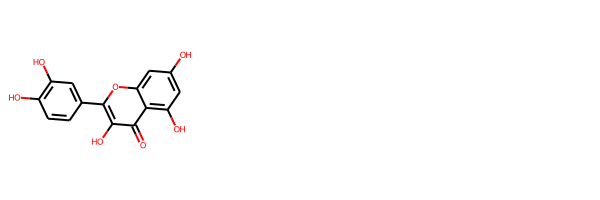

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage([quercetine_mol])

## rdkit.Chem.MolFromMolBlock(mol_block)

In [ ]:
quercetine_sdf = pcp.get_sdf('quercetine', 'name')
print(quercetine_sdf)

5280343
  -OEChem-10092201502D

 32 34  0     0  0  0  0  0  0999 V2000
    6.0682   -0.2704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003    1.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.3198    2.7642    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    2.7296    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.5381   -0.2945    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.6663   -2.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   10.3984   -1.7704    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2022    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    0.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    7.8003   -0.2704    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.9343    1.2296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0682    1.7296    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.3083    1.76

In [ ]:
Chem.MolFromMolBlock(quercetine_sdf)

## rdkit.Chem.MolFromInchi(Inchi)

In [ ]:
quercetine_inchi = quercetine[0].inchi
quercetine_inchi

'InChI=1S/C15H10O7/c16-7-4-10(19)12-11(5-7)22-15(14(21)13(12)20)6-1-2-8(17)9(18)3-6/h1-5,16-19,21H'

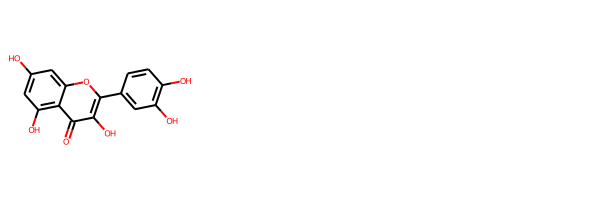

In [ ]:
Draw.MolsToGridImage([Chem.MolFromInchi(quercetine_inchi)])

In [ ]:
# その他の読み込み方法もあるが、必要に応じて調べてみてください。
help(Chem.MolFromPDBFile)

Help on built-in function MolFromPDBFile in module rdkit.Chem.rdmolfiles:

MolFromPDBFile(...)
    MolFromPDBFile( (str)molFileName [, (bool)sanitize=True [, (bool)removeHs=True [, (int)flavor=0 [, (bool)proximityBonding=True]]]]) -> Mol :
        Construct a molecule from a PDB file.
        
          ARGUMENTS:
        
            - fileName: name of the file to read
        
            - sanitize: (optional) toggles sanitization of the molecule.
              Defaults to true.
        
            - removeHs: (optional) toggles removing hydrogens from the molecule.
              This only make sense when sanitization is done.
              Defaults to true.
        
            - flavor: (optional) 
        
            - proximityBonding: (optional) toggles automatic proximity bonding
        
          RETURNS:
        
            a Mol object, None on failure.
        
        
    
        C++ signature :
            RDKit::ROMol* MolFromPDBFile(char const* [,bool=True [,boo

# 複数分子の読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -P /content/drive/MyDrive/data https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf

--2022-10-09 05:50:27--  https://raw.githubusercontent.com/chemoinformatics-lecture/lecture-beginner/main/lesson04_RDKit/data/PubChem_TCI_phenol_records.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373649 (365K) [text/plain]
Saving to: ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.2’

PubChem_TCI_phenol_ 100%[===================>] 364.89K  --.-KB/s    in 0.03s   

2022-10-09 05:50:27 (10.6 MB/s) - ‘/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf.2’ saved [373649/373649]



In [ ]:
suppl = Chem.SDMolSupplier('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')

In [ ]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

In [ ]:
# supplを変換してリストにする。
mols = [mol for mol in suppl]

In [ ]:
len(mols)

117

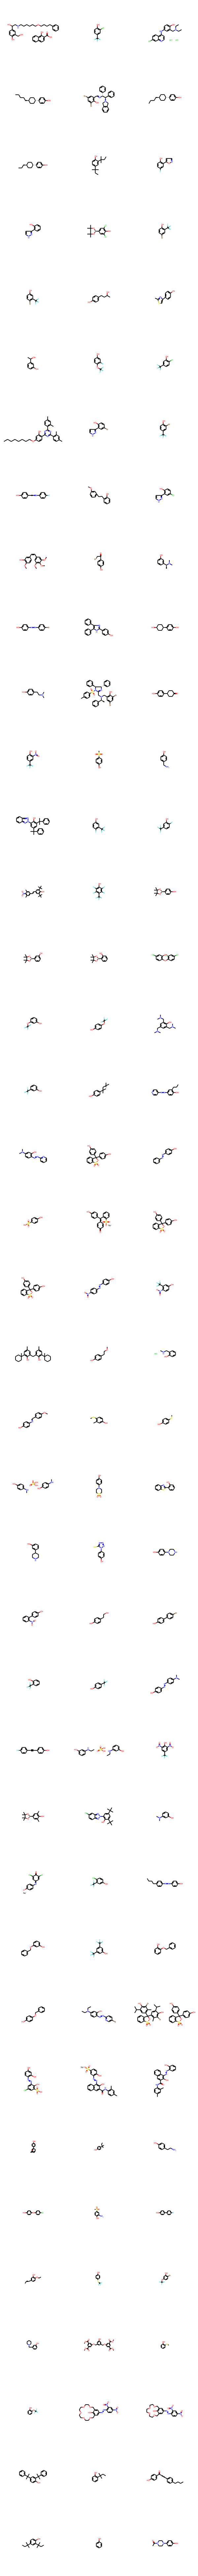

In [ ]:
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols)

# Pandasのデータフレームに変換

In [ ]:
from rdkit.Chem import AllChem, PandasTools

In [ ]:
df = PandasTools.LoadSDF('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')

,PUBCHEM_COMPOUND_ID_TYPE,PUBCHEM_TOTAL_CHARGE,PUBCHEM_SUBSTANCE_ID,PUBCHEM_SUBSTANCE_VERSION,PUBCHEM_EXT_DATASOURCE_NAME,PUBCHEM_EXT_DATASOURCE_REGID,PUBCHEM_SUBSTANCE_SYNONYM,PUBCHEM_XREF_EXT_ID,PUBCHEM_EXT_DATASOURCE_URL,PUBCHEM_EXT_SUBSTANCE_URL,PUBCHEM_CID_ASSOCIATIONS,PUBCHEM_COORDINATE_TYPE,ID,ROMol,PUBCHEM_BONDANNOTATIONS,PUBCHEM_SUBSTANCE_COMMENT,PUBCHEM_GENERIC_REGISTRY_NAME
0,0,0,354335558,1,TCI (Tokyo Chemical Industry),A3190,4-[1-Hydroxy-2-[[6-(4-phenylbutoxy)hexyl]amino...,A3190,http://www.tcichemicals.com/en/us/,http://www.tcichemicals.com/eshop/en/us/commod...,56801 1\n5152 2\n6844 2,1\n3,354335558,,NaN,NaN,NaN

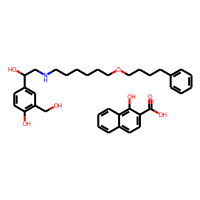

In [ ]:
df.head(1)

In [ ]:
df.columns

Index(['PUBCHEM_COMPOUND_ID_TYPE', 'PUBCHEM_TOTAL_CHARGE',
       'PUBCHEM_SUBSTANCE_ID', 'PUBCHEM_SUBSTANCE_VERSION',
       'PUBCHEM_EXT_DATASOURCE_NAME', 'PUBCHEM_EXT_DATASOURCE_REGID',
       'PUBCHEM_SUBSTANCE_SYNONYM', 'PUBCHEM_XREF_EXT_ID',
       'PUBCHEM_EXT_DATASOURCE_URL', 'PUBCHEM_EXT_SUBSTANCE_URL',
       'PUBCHEM_CID_ASSOCIATIONS', 'PUBCHEM_COORDINATE_TYPE', 'ID', 'ROMol',
       'PUBCHEM_BONDANNOTATIONS', 'PUBCHEM_SUBSTANCE_COMMENT',
       'PUBCHEM_GENERIC_REGISTRY_NAME'],
      dtype='object')

,ID,ROMol
0,354335558,
1,354335473,
2,354335166,

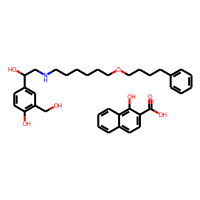
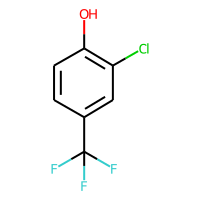
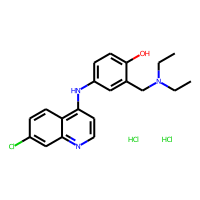

In [ ]:
df2 = df[['ID','ROMol']]
df2.head(3)

# すでに読み込んだデータフレームの中にあるsmilesをmolファイルに変換する。

In [ ]:
compoundlist = ["phenol", "anisole", "aniline" ]
properties = ['iupacname', 'canonicalsmiles']

In [ ]:
import sys
import pandas as pd

df = pd.DataFrame()
for compound in compoundlist:
    try:
        temp = pcp.get_properties(properties, compound, 'name', as_dataframe=True)
        #as_dataframe=True とすることでpandas dataframe として情報を取得可能
        df = pd.concat([df,temp], axis=0, join='outer', sort=True)
    except:
        print("--------error-----------")
        print(cas)
        print(sys.exc_info())
        pass

In [ ]:
df

,CanonicalSMILES,IUPACName
CID,,
996,C1=CC=C(C=C1)O,phenol
7519,COC1=CC=CC=C1,anisole
6115,C1=CC=C(C=C1)N,aniline


In [ ]:
#すでにSMILESが書かれているものに対してMolオブジェクトを追加するやり方
PandasTools.AddMoleculeColumnToFrame(df, "CanonicalSMILES")

,CanonicalSMILES,IUPACName,ROMol
CID,,,
996,C1=CC=C(C=C1)O,phenol,

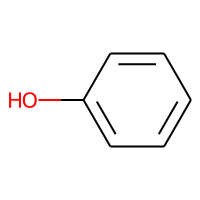

In [ ]:
df.head(1)

## RDKitとpubchemで出力するsmilesの差

In [ ]:
df["smiles_from_RDKit"] = df["ROMol"].map(Chem.MolToSmiles)

,CanonicalSMILES,IUPACName,ROMol,smiles_from_RDKit
CID,,,,
996,C1=CC=C(C=C1)O,phenol,,Oc1ccccc1

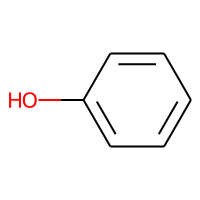

In [ ]:
df.head(1)

## 出力

In [ ]:
df_to_csv = df[['IUPACName', 'smiles_from_RDKit']]
df_to_csv

,IUPACName,smiles_from_RDKit
CID,,
996,phenol,Oc1ccccc1
7519,anisole,COc1ccccc1
6115,aniline,Nc1ccccc1


In [ ]:
df_to_csv.to_csv('output.csv', index="False")

In [ ]:
df_from_csv = pd.read_csv('output.csv')
df_from_csv

,CID,IUPACName,smiles_from_RDKit
0,996,phenol,Oc1ccccc1
1,7519,anisole,COc1ccccc1
2,6115,aniline,Nc1ccccc1
